<a href="https://colab.research.google.com/github/lcbjrrr/algojust/blob/main/Pmpt03_statsMiss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- **Statistical Misinterpretation**: Misinterpreting results happens when conclusions don’t align with proper statistical analysis, leading to misleading findings. Common issues include assuming correlation means causation, cherry-picking data, or ignoring confounding factors. This can distort research outcomes and impact decision-making. Want to refine it further?


*The data used herein is for illustrative purposes only and does not reflect actual real-world data*.



> Read the 'Covid - Cytokine.csv' file and show the dataframe



In [1]:
import pandas as pd
df = pd.read_csv('Covid - Cytokine.csv')
display(df.head())

,PREmRNA,POSTmRNA,PlacebomRNA,PREVector,POSTVector,PlaceboVector,PREProtein,POSTProtein,PlaceboProtein,PREInactivated,POSTInactivated,PlaceboInactivated,PreDNA,PostDNA,PlaceboDNA
0,40,660,0,40,330.0,0,40,220,0,22,88,0,5,11,0
1,40,150,1,40,75.0,1,40,50,1,33,99,1,11,11,1
2,10,30,1,10,15.0,1,10,10,1,22,88,1,22,22,1
3,20,60,1,20,30.0,1,20,20,1,11,111,1,6,5,1
4,11,45,0,11,22.5,0,11,15,0,22,122,0,7,12,0


#### Are any of the vaccines effective? Let's take the DNA based one as an initial exemple...



> For the DNA vaccine, filter out the placebo ones (column PlaceboDNA
!=1)

In [4]:
df_dna = df[df['PlaceboDNA'] != 1]
display(df_dna.head())

,PREmRNA,POSTmRNA,PlacebomRNA,PREVector,POSTVector,PlaceboVector,PREProtein,POSTProtein,PlaceboProtein,PREInactivated,POSTInactivated,PlaceboInactivated,PreDNA,PostDNA,PlaceboDNA
0,40,660,0,40,330.0,0,40,220,0,22,88,0,5,11,0
4,11,45,0,11,22.5,0,11,15,0,22,122,0,7,12,0
5,22,999,0,22,499.5,0,22,333,0,33,133,0,8,13,0
6,5,999,0,5,499.5,0,5,333,0,30,120,0,9,12,0
7,6,999,0,6,499.5,0,6,333,0,20,130,0,11,22,0




> With the filtered DNA vaccine records, caculate the average measurements of the pre and post effects, and show it in a bar chart



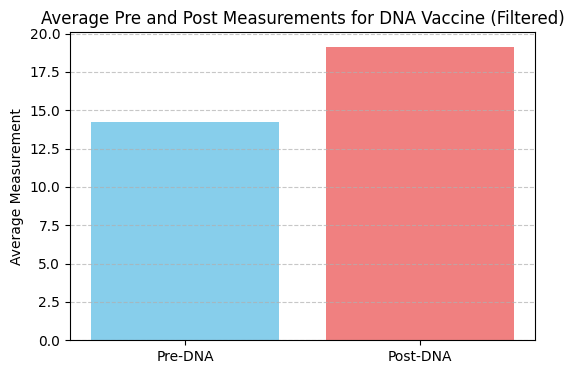

In [5]:
import matplotlib.pyplot as plt

# Calculate averages from the filtered df_dna
pre_dna_avg = df_dna['PreDNA'].mean()
post_dna_avg = df_dna['PostDNA'].mean()

data = {'Pre-DNA': pre_dna_avg, 'Post-DNA': post_dna_avg}
labels = list(data.keys())
values = list(data.values())

plt.figure(figsize=(6, 4))
plt.bar(labels, values, color=['skyblue', 'lightcoral'])
plt.ylabel('Average Measurement')
plt.title('Average Pre and Post Measurements for DNA Vaccine (Filtered)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

*The average pre-DNA measurement is 12.64 and the average post-DNA measurement is 15.36.*

#### How sure are you?

Statistical significance indicates whether an observed effect (like a difference between groups) is likely due to chance or a real phenomenon. It's often determined by a p-value. A common threshold is p < 0.05, meaning there's less than a 5% chance the observed effect occurred randomly.

Confidence intervals provide a range of values within which the true population parameter (e.g., mean difference) is likely to lie, with a certain level of confidence (e.g., 95%).



> Re-create the bar chart with the SEM (standard error mean) for a 95% confidence (5% siginificance).



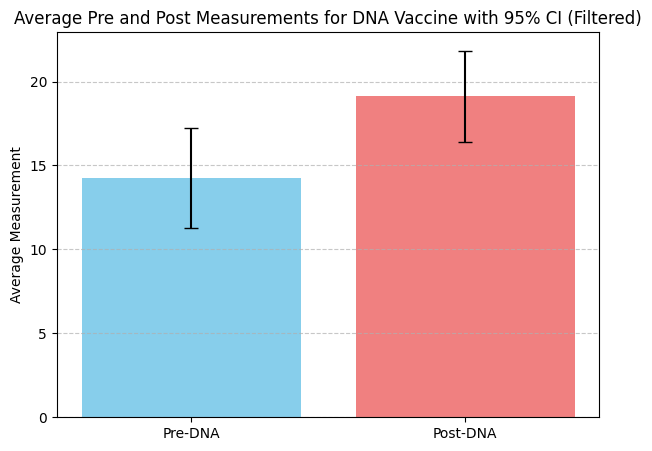

In [6]:
import matplotlib.pyplot as plt
from scipy.stats import sem
import numpy as np

# Calculate SEM for PreDNA and PostDNA from the filtered dataframe df_dna
pre_dna_sem = sem(df_dna['PreDNA'])
post_dna_sem = sem(df_dna['PostDNA'])

# For 95% confidence, the critical value is approximately 1.96
# We multiply SEM by 1.96 to get the margin of error for a 95% confidence interval
margin_error_pre = 1.96 * pre_dna_sem
margin_error_post = 1.96 * post_dna_sem

# Get the previously calculated averages (which are from the filtered df_dna)
# pre_dna_avg and post_dna_avg were calculated in the previous step from df_dna.
labels = ['Pre-DNA', 'Post-DNA']
values = [pre_dna_avg, post_dna_avg]
errors = [margin_error_pre, margin_error_post]

plt.figure(figsize=(7, 5))
plt.bar(labels, values, yerr=errors, capsize=5, color=['skyblue', 'lightcoral'])
plt.ylabel('Average Measurement')
plt.title('Average Pre and Post Measurements for DNA Vaccine with 95% CI (Filtered)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

*Looking at the bar chart with the 95% confidence intervals, we can see that the error bars for 'Pre-DNA' and 'Post-DNA' overlap significantly. This overlap suggests that the difference between the average pre-DNA measurement (12.64) and the average post-DNA measurement (15.36) **is NOT statistically significant** at the 0.05 level. In simpler terms, based on this visual representation, we cannot confidently conclude that the DNA vaccine caused a statistically significant change in the measured effect. The observed difference could plausibly be due to random variation*.

#### Let's take another vaccine then, how about Inactivated virus based one?



> For the Inactivated vaccine, filter out the placebo ones (column PlaceboDNA !=1)



In [7]:
df_inactivated = df[df['PlaceboInactivated'] != 1]
display(df_inactivated.head())

,PREmRNA,POSTmRNA,PlacebomRNA,PREVector,POSTVector,PlaceboVector,PREProtein,POSTProtein,PlaceboProtein,PREInactivated,POSTInactivated,PlaceboInactivated,PreDNA,PostDNA,PlaceboDNA
0,40,660,0,40,330.0,0,40,220,0,22,88,0,5,11,0
4,11,45,0,11,22.5,0,11,15,0,22,122,0,7,12,0
5,22,999,0,22,499.5,0,22,333,0,33,133,0,8,13,0
6,5,999,0,5,499.5,0,5,333,0,30,120,0,9,12,0
7,6,999,0,6,499.5,0,6,333,0,20,130,0,11,22,0




> With this filtered Inactive vaccines dataframe, re-create the bar chart with the SEM comparing the effects on the Pre and Post for this vaccine



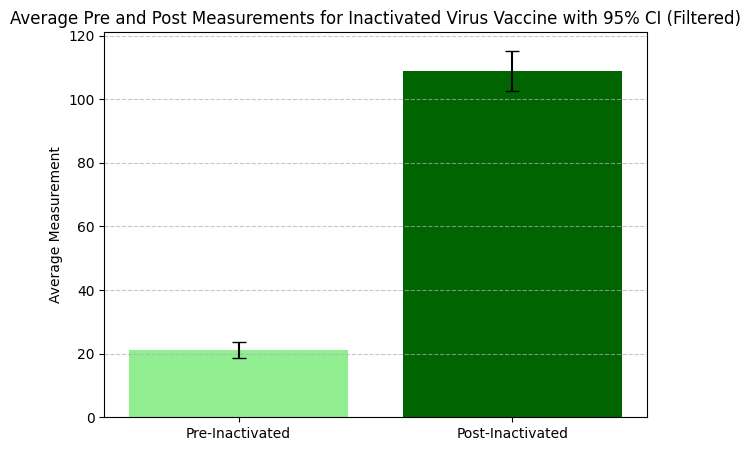

In [8]:
import matplotlib.pyplot as plt
from scipy.stats import sem
import numpy as np

# Calculate SEM for PREInactivated and POSTInactivated from the filtered dataframe df_inactivated
pre_inactivated_sem = sem(df_inactivated['PREInactivated'])
post_inactivated_sem = sem(df_inactivated['POSTInactivated'])

# For 95% confidence, the critical value for a large sample or known standard deviation is approximately 1.96
# We multiply SEM by 1.96 to get the margin of error for a 95% confidence interval
margin_error_pre_inactivated = 1.96 * pre_inactivated_sem
margin_error_post_inactivated = 1.96 * post_inactivated_sem

# Get the averages from the filtered dataframe df_inactivated
pre_inactivated_avg = df_inactivated['PREInactivated'].mean()
post_inactivated_avg = df_inactivated['POSTInactivated'].mean()

labels = ['Pre-Inactivated', 'Post-Inactivated']
values = [pre_inactivated_avg, post_inactivated_avg]
errors = [margin_error_pre_inactivated, margin_error_post_inactivated]

plt.figure(figsize=(7, 5))
plt.bar(labels, values, yerr=errors, capsize=5, color=['lightgreen', 'darkgreen'])
plt.ylabel('Average Measurement')
plt.title('Average Pre and Post Measurements for Inactivated Virus Vaccine with 95% CI (Filtered)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

*In the bar chart for 'Pre-Inactivated' and 'Post-Inactivated' measurements, the error bars representing the 95% confidence intervals do not overlap. The 'Pre-Inactivated' error bar is entirely separate from the 'Post-Inactivated' error bar. This lack of overlap indicates that the difference between the average pre-inactivated measurement (21.14) and the average post-inactivated measurement (104.93) **IS statistically significant** at the 0.05 level. We can confidently conclude that the Inactivated virus vaccine caused a statistically significant increase in the measured effect*.

#### Make sure to compare your results um a control group, for intance, people that took placebo.

In the medical field, placebo is an inactive substance or treatment that looks like, and is administered in the same way as, an active drug or treatment, but has no medical effect. It's crucial in the medical field to determine if the observed effects of a new treatment are due to the treatment itself or to psychological factors (the 'placebo effect'). By comparing a treatment group to a placebo group, researchers can isolate the true physiological impact of the active treatment, ensuring that medical interventions are genuinely effective



> Now filter for only the placebo records for the Inactivated virus vaccine



In [9]:
df_inactivated_placebo = df[df['PlaceboInactivated'] == 1]
display(df_inactivated_placebo.head())

,PREmRNA,POSTmRNA,PlacebomRNA,PREVector,POSTVector,PlaceboVector,PREProtein,POSTProtein,PlaceboProtein,PREInactivated,POSTInactivated,PlaceboInactivated,PreDNA,PostDNA,PlaceboDNA
1,40,150,1,40,75.0,1,40,50,1,33,99,1,11,11,1
2,10,30,1,10,15.0,1,10,10,1,22,88,1,22,22,1
3,20,60,1,20,30.0,1,20,20,1,11,111,1,6,5,1
11,4,24,1,4,12.0,1,4,8,1,10,90,1,7,7,1
12,3,18,1,3,9.0,1,3,6,1,20,99,1,8,8,1




> Create a new bar chart with the SEM comparing the Post effects between the non-placebo and the placebo one for the Inactivated virus vaccine.



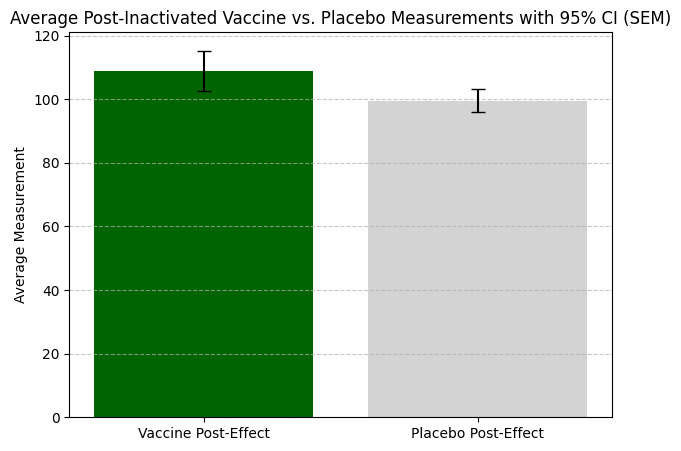

In [11]:
import matplotlib.pyplot as plt
from scipy.stats import sem
import numpy as np

# Calculate SEM for POSTInactivated from the vaccine group (df_inactivated)
post_inactivated_sem = sem(df_inactivated['POSTInactivated'])
# Calculate SEM for POSTInactivated from the placebo group (df_inactivated_placebo)
placebo_inactivated_sem = sem(df_inactivated_placebo['POSTInactivated'])

# For 95% confidence, the critical value for a large sample or known standard deviation is approximately 1.96
# We multiply SEM by 1.96 to get the margin of error for a 95% confidence interval
margin_error_post_inactivated = 1.96 * post_inactivated_sem
margin_error_placebo_inactivated = 1.96 * placebo_inactivated_sem

# Get the averages from the respective filtered dataframes
post_inactivated_avg = df_inactivated['POSTInactivated'].mean()
placebo_inactivated_avg = df_inactivated_placebo['POSTInactivated'].mean()

labels = ['Vaccine Post-Effect', 'Placebo Post-Effect']
values = [post_inactivated_avg, placebo_inactivated_avg]
errors = [margin_error_post_inactivated, margin_error_placebo_inactivated]

plt.figure(figsize=(7, 5))
plt.bar(labels, values, yerr=errors, capsize=5, color=['darkgreen', 'lightgrey'])
plt.ylabel('Average Measurement')
plt.title('Average Post-Inactivated Vaccine vs. Placebo Measurements with 95% CI (SEM)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

*Based on the bar chart with 95% confidence intervals comparing the 'Vaccine Post-Effect' and 'Placebo Post-Effect': The error bars for both groups significantly overlap. This overlap indicates that the difference between the average post-effect for the Inactivated vaccine and the average post-effect for the placebo group is NOT statistically significant at the 0.05 level. Therefore, we cannot confidently conclude that the Inactivated virus vaccine caused a statistically significant increase in the measured effect compared to the placebo*

#### Let's check on the RNA based one:



> For the RNA vaccine, filter out the placebo ones (column PlaceboDNA !=1)



In [13]:
df_rna = df[df['PlacebomRNA'] != 1]
display(df_rna.head())

,PREmRNA,POSTmRNA,PlacebomRNA,PREVector,POSTVector,PlaceboVector,PREProtein,POSTProtein,PlaceboProtein,PREInactivated,POSTInactivated,PlaceboInactivated,PreDNA,PostDNA,PlaceboDNA
0,40,660,0,40,330.0,0,40,220,0,22,88,0,5,11,0
4,11,45,0,11,22.5,0,11,15,0,22,122,0,7,12,0
5,22,999,0,22,499.5,0,22,333,0,33,133,0,8,13,0
6,5,999,0,5,499.5,0,5,333,0,30,120,0,9,12,0
7,6,999,0,6,499.5,0,6,333,0,20,130,0,11,22,0




> With this filtered RNA vaccines dataframe, re-create the bar chart with the SEM comparing the effects on the Pre and Post for this vaccine



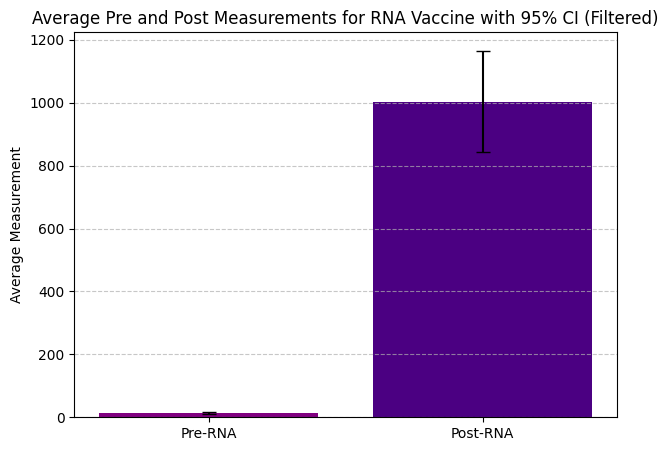

In [14]:
import matplotlib.pyplot as plt
from scipy.stats import sem
import numpy as np

# Calculate SEM for PREmRNA and POSTmRNA from the filtered dataframe df_rna
pre_rna_sem = sem(df_rna['PREmRNA'])
post_rna_sem = sem(df_rna['POSTmRNA'])

# For 95% confidence, the critical value is approximately 1.96
# We multiply SEM by 1.96 to get the margin of error for a 95% confidence interval
margin_error_pre_rna = 1.96 * pre_rna_sem
margin_error_post_rna = 1.96 * post_rna_sem

# Get the averages from the filtered dataframe df_rna
pre_rna_avg = df_rna['PREmRNA'].mean()
post_rna_avg = df_rna['POSTmRNA'].mean()

labels = ['Pre-RNA', 'Post-RNA']
values = [pre_rna_avg, post_rna_avg]
errors = [margin_error_pre_rna, margin_error_post_rna]

plt.figure(figsize=(7, 5))
plt.bar(labels, values, yerr=errors, capsize=5, color=['purple', 'indigo'])
plt.ylabel('Average Measurement')
plt.title('Average Pre and Post Measurements for RNA Vaccine with 95% CI (Filtered)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



> Now filter for only the placebo records for the RNA vaccine



In [16]:
df_rna_placebo = df[df['PlacebomRNA'] == 1]
display(df_rna_placebo.head())

,PREmRNA,POSTmRNA,PlacebomRNA,PREVector,POSTVector,PlaceboVector,PREProtein,POSTProtein,PlaceboProtein,PREInactivated,POSTInactivated,PlaceboInactivated,PreDNA,PostDNA,PlaceboDNA
1,40,150,1,40,75.0,1,40,50,1,33,99,1,11,11,1
2,10,30,1,10,15.0,1,10,10,1,22,88,1,22,22,1
3,20,60,1,20,30.0,1,20,20,1,11,111,1,6,5,1
11,4,24,1,4,12.0,1,4,8,1,10,90,1,7,7,1
12,3,18,1,3,9.0,1,3,6,1,20,99,1,8,8,1




> Create a new bar chart with the SEM comparing the Post effects between the non-placebo and the placebo one for the RNA vaccine.



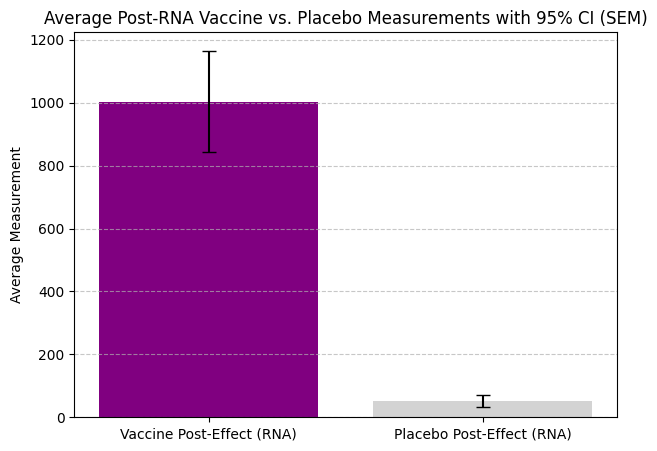

In [17]:
import matplotlib.pyplot as plt
from scipy.stats import sem
import numpy as np

# Calculate SEM for POSTmRNA from the vaccine group (df_rna)
post_rna_sem = sem(df_rna['POSTmRNA'])
# Calculate SEM for POSTmRNA from the placebo group (df_rna_placebo)
placebo_rna_sem = sem(df_rna_placebo['POSTmRNA'])

# For 95% confidence, the critical value for a large sample or known standard deviation is approximately 1.96
# We multiply SEM by 1.96 to get the margin of error for a 95% confidence interval
margin_error_post_rna = 1.96 * post_rna_sem
margin_error_placebo_rna = 1.96 * placebo_rna_sem

# Get the averages from the respective filtered dataframes
post_rna_avg = df_rna['POSTmRNA'].mean()
placebo_rna_avg = df_rna_placebo['POSTmRNA'].mean()

labels = ['Vaccine Post-Effect (RNA)', 'Placebo Post-Effect (RNA)']
values = [post_rna_avg, placebo_rna_avg]
errors = [margin_error_post_rna, margin_error_placebo_rna]

plt.figure(figsize=(7, 5))
plt.bar(labels, values, yerr=errors, capsize=5, color=['purple', 'lightgrey'])
plt.ylabel('Average Measurement')
plt.title('Average Post-RNA Vaccine vs. Placebo Measurements with 95% CI (SEM)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

*The bar chart comparing the 'Vaccine Post-Effect (RNA)' and 'Placebo Post-Effect (RNA)' clearly shows that the error bars (representing the 95% confidence intervals) for both groups do not overlap. This indicates that the difference between the average post-effect for the RNA vaccine and the average post-effect for the placebo group IS statistically significant at the 0.05 level. In simpler terms, we can confidently conclude that the RNA vaccine caused a statistically significant increase in the measured effect compared to the placebo.*

#### Are any of the vaccines "more efficient" than the others? Meaning, is there a statistically significant relationship between two categorical variables by comparing observed frequencies to expected frequencies?

# Chi-Squared test

The **Chi-Squared test** (often written as χ2 test) is a statistical hypothesis test that is widely used in the analysis of categorical data. It helps determine if there is a significant association between two categorical variables or if the observed frequency distribution of a single categorical variable differs from an expected frequency distribution.






> Read the 'Covid19 - Immune.csv' file and show the dataframe



In [18]:
import pandas as pd
df_immune = pd.read_csv('Covid19 - Immune.csv')
Read the 'Covid19 - Immune.csv' file and show the dataframe



> Create a crosstab comparing the number of people who became immune and the number who didn't for the DNA and RNA vaccines (only)


In [21]:
df_dna_rna = df_immune[df_immune['Type'].isin(['DNA', 'RNA'])]
contingency_table_dna_rna = pd.crosstab(df_dna_rna['Type'], df_dna_rna['Immune'])
display(contingency_table_dna_rna)

Immune,0,1
Type,,
DNA,39,15
RNA,11,45


## Contingency table

A contingency table displays the frequency of data across two categorical variables, helping reveal relationships or patterns between them.


|          | Immune | Not | Total |
|----------|------|------|-------|
| mRNA | 25   | 5    | **30**    |
| DNA  | 5    | 10   | **15**    |
| **Total**    | **30**   | **15**   | **45**    |





> Expand the crosstab including the marginal sums



In [22]:
df_dna_rna = df_immune[df_immune['Type'].isin(['DNA', 'RNA'])]
contingency_table_dna_rna_with_margins = pd.crosstab(df_dna_rna['Type'], df_dna_rna['Immune'], margins=True)
display(contingency_table_dna_rna_with_margins)

Immune,0,1,All
Type,,,
DNA,39,15,54
RNA,11,45,56
All,50,60,110


$$T \times P(mRNA) \times P(imu) = total \times \left( \frac{mRNA}{total} \right) \left( \frac{immune}{total}\right).
$$




|          | **.................Immune.................** | **.............Not Immune.............** |
|----------|------|------|
| **mRNA** | $T \times P(mRNA) \times P(imu)$    | $T \times P(mRNA) \times  P(not)$    |
| **DNA**  | $T \times P(DNA) \times P(imu)$    | $T \times P(DNA) \times P(not)$     |

### Let's calculate the contigency table



> Create the contigency table, with the exepected frequencies for those (DNA and RNA)



In [25]:
import pandas as pd

# Re-use the contingency table with margins for easier calculation of totals and probabilities
# contingency_table_dna_rna_with_margins was calculated previously

# Get total N
Total = contingency_table_dna_rna_with_margins.loc['All', 'All']

# Get row totals (Type totals)
Total_mRNA = contingency_table_dna_rna_with_margins.loc['RNA', 'All']
Total_DNA = contingency_table_dna_rna_with_margins.loc['DNA', 'All']

# Get column totals (Immune status totals)
Total_Immune = contingency_table_dna_rna_with_margins.loc['All', 1]
Total_Not_Immune = contingency_table_dna_rna_with_margins.loc['All', 0]

# Calculate expected frequencies
Expected_mRNA_Immune = (Total_mRNA / Total) * (Total_Immune / Total) * Total
Expected_mRNA_Not_Immune = (Total_mRNA / Total) * (Total_Not_Immune / Total) * Total
Expected_DNA_Immune = (Total_DNA / Total) * (Total_Immune / Total) * Total
Expected_DNA_Not_Immune = (Total_DNA / Total) * (Total_Not_Immune / Total) * Total

# Create a DataFrame for the expected contingency table
expected_contingency_table = pd.DataFrame({
    'Immune': [Expected_DNA_Immune, Expected_mRNA_Immune],
    'Not Immune': [Expected_DNA_Not_Immune, Expected_mRNA_Not_Immune]
}, index=['DNA', 'RNA'])

expected_contingency_table.index.name = 'Type'
expected_contingency_table.columns.name = 'Expected'

display(expected_contingency_table)

Expected,Immune,Not Immune
Type,,
DNA,29.454545,24.545455
RNA,30.545455,25.454545




> Apply the statistical test **chisquare** from scipy.stats, comparing the observed frequencies and the expected ones.



In [27]:
from scipy.stats import chisquare
import numpy as np

# Extract observed frequencies from contingency_table_dna_rna and flatten
observed_frequencies = contingency_table_dna_rna.values.flatten()

# Extract expected frequencies from expected_contingency_table and flatten
# Ensure the order matches the observed_frequencies (e.g., DNA Not Immune, DNA Immune, RNA Not Immune, RNA Immune)
expected_frequencies = expected_contingency_table.loc[['DNA', 'RNA'], ['Not Immune', 'Immune']].values.flatten()

# Perform the Chi-squared test
chi2_result = chisquare(f_obs=observed_frequencies, f_exp=expected_frequencies)

print(chi2_result)

Power_divergenceResult(statistic=np.float64(30.653769841269845), pvalue=np.float64(1.0053844544937354e-06))


*The chisquare test yielded a Chi-squared statistic of 30.65 and a p-value of 1.0e-06 (0.000001). This extremely small p-value (which is significantly less than the common significance level of 0.05) indicates that the observed frequencies for immunity (or lack thereof) among the DNA and RNA vaccine groups are significantly different from what would be expected if there were no association between vaccine type and immunity. In practical terms, this result provides strong evidence to conclude that there is a statistically significant relationship between the type of vaccine (DNA vs. RNA) and whether a person develops immunity. This suggests that the RNA vaccine is indeed 'more efficient' or at least has a different impact on immunity compared to the DNA vaccine, and this difference is not likely due to random chance.*



## Activity: Statistical Misinterpretation


**Problem**

Statistical misinterpretation can severely distort research and decision-making by leading to misleading findings. In this sense, find a dataset on Kaggle that enables the comparison of at least two distinct groups. Ideally, your chosen dataset will include a control group. Then:

- Group Comparison: Select a quantitative aspect within the dataset. Compare the overall results of your two chosen groups based on this aspect, identifying a primary difference.

- Statistical Significance: Perform an appropriate statistical test to validate if this identified difference between your two groups is statistically significant, using the confidence interval concept. If a control group exists, extend your analysis to compare each primary group against it.

- Frequency Analysis & Chi-Square: Identify a categorical variable. Compare the frequency of results for this variable between your two primary groups and validate any observed differences using a Chi-Square test.

**Conclusions**

Based on your analyses, clearly articulate your conclusions regarding the statistical significance of your findings for both the group comparisons and the frequency analysis. Discuss what these findings imply in the context of the dataset and the potential for misinterpretation.

# Appendix



> Create the contigency table for those (DNA and RNA), considering the follow definition of it:

$$T \times P(mRNA) \times P(imu) = total \times \left( \frac{mRNA}{total} \right) \left( \frac{immune}{total}\right).
$$

|          | **.................Immune.................** | **.............Not Immune.............** |
|----------|------|------|
| **mRNA** | $T \times P(mRNA) \times P(imu)$    | $T \times P(mRNA) \times  P(not)$    |
| **DNA**  | $T \times P(DNA) \times P(imu)$    | $T \times P(DNA) \times P(not)$     |





```
import pandas as pd

# Re-use the contingency table with margins for easier calculation of totals and probabilities
# contingency_table_dna_rna_with_margins was calculated in cell c4bMgXphb4au

# Get total N
Total = contingency_table_dna_rna_with_margins.loc['All', 'All']

# Get row totals (Type totals)
Total_mRNA = contingency_table_dna_rna_with_margins.loc['RNA', 'All']
Total_DNA = contingency_table_dna_rna_with_margins.loc['DNA', 'All']

# Get column totals (Immune status totals)
Total_Immune = contingency_table_dna_rna_with_margins.loc['All', 1]
Total_Not_Immune = contingency_table_dna_rna_with_margins.loc['All', 0]

# Calculate expected frequencies
Expected_mRNA_Immune = (Total_mRNA / Total) * (Total_Immune / Total) * Total
Expected_mRNA_Not_Immune = (Total_mRNA / Total) * (Total_Not_Immune / Total) * Total
Expected_DNA_Immune = (Total_DNA / Total) * (Total_Immune / Total) * Total
Expected_DNA_Not_Immune = (Total_DNA / Total) * (Total_Not_Immune / Total) * Total

# Create a DataFrame for the expected contingency table
expected_contingency_table = pd.DataFrame({
    'Immune': [Expected_DNA_Immune, Expected_mRNA_Immune],
    'Not Immune': [Expected_DNA_Not_Immune, Expected_mRNA_Not_Immune]
}, index=['DNA', 'RNA'])

expected_contingency_table.index.name = 'Type'
expected_contingency_table.columns.name = 'Expected'

display(expected_contingency_table)

```

